In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data = pd.read_csv('churn_prediction.csv')

In [56]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [57]:
data.shape

(28382, 21)

In [58]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [59]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [60]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

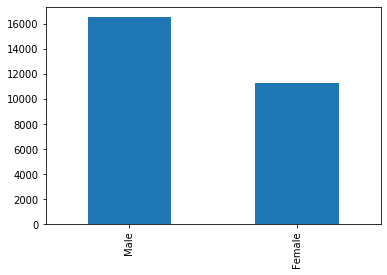

In [61]:
data['gender'].value_counts().plot(kind='bar')

# Data Manipulation- Removing duplicate and missing values

In [62]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [63]:
data=data.drop_duplicates()

In [64]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [65]:
data['gender'].fillna(value=data['gender'].mode()[0],inplace=True)

In [66]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [67]:
data['dependents'].fillna(value=data['dependents'].mode()[0],inplace=True)

In [68]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [69]:
data['occupation'].fillna(value=data['occupation'].mode()[0],inplace=True)

In [70]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [71]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [72]:
data['city'].describe()

count    27579.000000
mean       796.109576
std        432.872102
min          0.000000
25%        409.000000
50%        834.000000
75%       1096.000000
max       1649.000000
Name: city, dtype: float64

In [73]:
data['city'].fillna(value=data['city'].mean(),inplace=True)

In [74]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [75]:
data['days_since_last_transaction'].describe()

count    25159.000000
mean        69.997814
std         86.341098
min          0.000000
25%         11.000000
50%         30.000000
75%         95.000000
max        365.000000
Name: days_since_last_transaction, dtype: float64

In [76]:
data['days_since_last_transaction'].fillna(value=data['days_since_last_transaction'].mean(),inplace=True)
data.shape

(28382, 21)

In [77]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [78]:
data.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [79]:
data['branch_code'].value_counts()

19      145
6       142
60      128
16      111
8       109
92      105
27       96
79       93
88       93
47       93
15       92
33       91
1        91
54       90
13       90
3        89
501      89
145      89
5        83
7        82
114      82
93       81
52       78
44       77
159      74
2        73
84       72
540      72
26       71
11       71
       ... 
1931      1
1283      1
3986      1
3466      1
2794      1
3450      1
2922      1
2954      1
3018      1
3066      1
3082      1
3114      1
2261      1
3178      1
3194      1
2213      1
3210      1
2197      1
3242      1
3258      1
2133      1
3274      1
3306      1
3338      1
1291      1
3386      1
3418      1
4082      1
4050      1
2049      1
Name: branch_code, Length: 3185, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [81]:
data=pd.get_dummies(data)

In [82]:
data.shape

(28382, 26)

In [83]:
data.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.000000,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,69.997814,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0.0,1020.000000,2,582,147.000000,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.000000,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


In [84]:
X=data.drop(['churn'],axis=1)
y=data['churn']
X.shape,y.shape

((28382, 25), (28382,))

In [85]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=50,stratify=y,test_size=0.2)

In [86]:
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,random_state=50,stratify=train_y,test_size=0.2)

In [87]:
scaler=MinMaxScaler()

In [88]:
cols=train_x.columns

In [89]:
train_x_scaled = scaler.fit_transform(train_x)
train_x=pd.DataFrame(train_x_scaled,columns=cols)

In [90]:
test_x_scaled = scaler.fit_transform(test_x)
test_x=pd.DataFrame(test_x_scaled,columns=cols)

In [91]:
valid_x_scaled = scaler.fit_transform(valid_x)
valid_x=pd.DataFrame(valid_x_scaled,columns=cols)

In [92]:
model=LogisticRegression()
model.fit(train_x,train_y)

C:\Users\HackXis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
valid_predict_log=model.predict(valid_x)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(valid_predict,valid_y)

0.5157454305219115

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=16)

In [115]:
dtree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
valid_predict_tree=dtree.predict(valid_x)

In [117]:
accuracy_score(valid_predict,valid_y)

0.5157454305219115

In [118]:
accuracy_score(dtree.predict(train_x),train_y)

0.9636643911032812

In [119]:
train=[]
valid=[]
r=range(2,50)
for i in r:
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(train_x,train_y)
    train.append(accuracy_score(dtree.predict(train_x),train_y))
    valid.append(accuracy_score(dtree.predict(valid_x),valid_y))

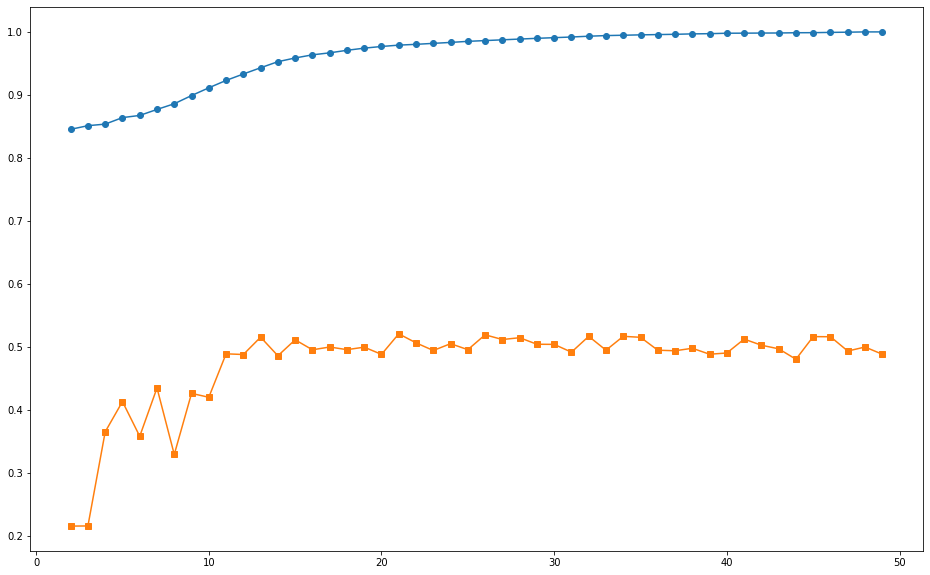

In [120]:
plt.figure(figsize=(16,10))
plt.plot(r,train,marker='o')
plt.plot(r,valid,marker='s')
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
train=[]
valid=[]
r=range(1,10)
for i in r:
    knn=KNeighborsClassifier(n_neighbors=i);
    knn.fit(train_x,train_y);
    train.append(f1_score(knn.predict(train_x),train_y))
    valid.append(f1_score(knn.predict(valid_x),valid_y))

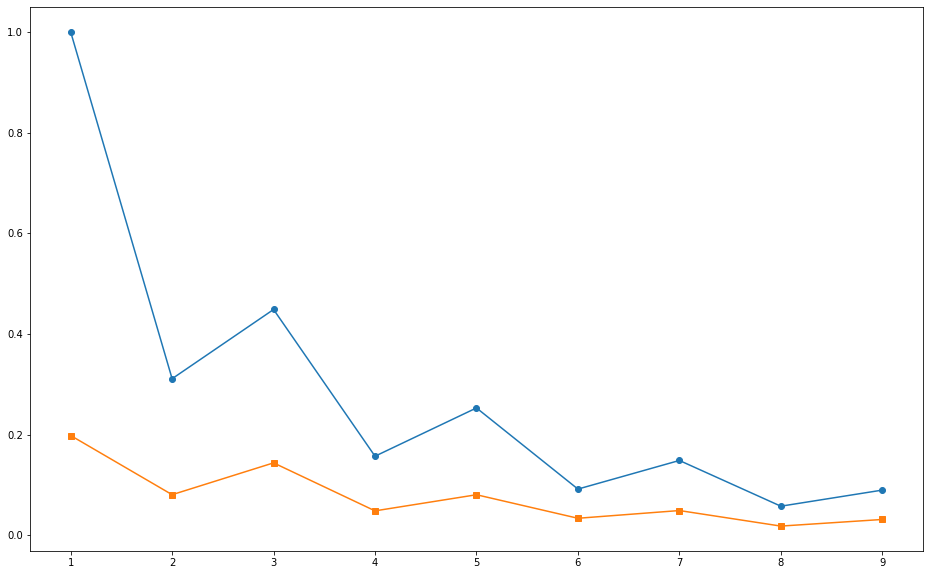

In [124]:
plt.figure(figsize=(16,10))
plt.plot(r,train,marker='o')
plt.plot(r,valid,marker='s')
plt.show()

In [126]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)
valid_predict_knn=knn.predict(valid_x)
print(knn.score(valid_x,valid_y))

0.7132790134331645


In [135]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mode([valid_predict_knn[i], valid_predict_tree[i], valid_predict_log[i]]))
accuracy_score(valid_y,final_pred)

0.7637084342655802

In [141]:
test_predict_knn=knn.predict(test_x)
test_predict_dtree=dtree.predict(test_x)
test_predict_log=model.predict(test_x)

# Max Voting

In [143]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([test_predict_knn[i], test_predict_dtree[i], test_predict_log[i]]))
accuracy_score(test_y,final_pred)

0.7636075391932359